In [1]:
import sqlite3

# Database file path
DATABASE_PATH = '/content/SwitchItUp(2)(1).db'

# Connect to the database
conn = sqlite3.connect(DATABASE_PATH)
cursor = conn.cursor()


cursor.execute("""
CREATE TABLE Users (
    User_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL,
    email TEXT NOT NULL,
    Address TEXT NOT NULL,
    Gender Text
)
""")


cursor.execute("""
CREATE TABLE Listings (
    Listing_id INTEGER UNIQUE PRIMARY KEY AUTOINCREMENT,
    Sold_by INTEGER NOT NULL,
    Location TEXT NOT NULL,
    Condition TEXT NOT NULL,
    Selling_Format Text NOT NULL,
    Shipping_Cost INTEGER NOT NULL,
    Item_Cost INTEGER NOT NULL,
    Item_Age INTEGER NOT NULL,
    Images TEXT,
    Availability TEXT,
    Posted_on DATE,
    Category TEXT NOT NULL,
    Product_Description TEXT NOT NULL,
    Listing_header TEXT NOT NULL,
    FOREIGN KEY (Sold_by) REFERENCES Users(User_id)
)
""")

cursor.execute("""
CREATE TABLE Audit(
  Audit_id INTEGER UNIQUE PRIMARY KEY AUTOINCREMENT,
  Listing_id INTEGER NOT NULL,
  Sold_by INTEGER NOT NULL,
  Sold_to INTEGER NOT NULL,
  Sold_on DATE NOT NULL,
  price INTEGER NOT NULL,
  Rating TEXT,
  FOREIGN KEY (Listing_id) REFERENCES Listings(Listing_id),
  FOREIGN KEY (Sold_by) REFERENCES Users(User_id)
)
""")

cursor.execute("""
CREATE TABLE Messages(
  Message_id INTEGER UNIQUE PRIMARY KEY AUTOINCREMENT,
  Sender INTEGER NOT NULL,
  Receiver INTEGER NOT NULL,
  Listing_id INTEGER NOT NULL,
  Message_content TEXT NOT NULL,
  Sent_on DATE NOT NULL,
  FOREIGN KEY (Sender) REFERENCES Users(User_id),
  FOREIGN KEY (Receiver) REFERENCES Users(User_id),
  FOREIGN KEY (Listing_id) REFERENCES Listings(Listing_id)
)
""")

cursor.execute("""
CREATE TABLE Item_category(
  Item_id INTEGER PRIMARY KEY AUTOINCREMENT,
  Category TEXT UNIQUE NOT NULL,
  Description TEXT NOT NULL,
  FOREIGN KEY (Category) REFERENCES Listings(Category)
)
""")
conn.commit()
cursor.close()
conn.close()

print("Tables created!")

Tables created!


In [ ]:
!pip install faker
from faker import Faker
import numpy as np
import pandas as pd
import random
import sqlite3
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [ ]:
conn = sqlite3.connect(DATABASE_PATH, timeout=10)
cursor = conn.cursor()

fake = Faker()

In [ ]:
Num_users = 1500

for _ in range(Num_users):
    first_name = fake.first_name()
    last_name = fake.last_name()
    email = fake.email()
    address = fake.address()
    gender = random.choice(['Male', 'Female', 'choose not to answer'])

    cursor.execute("""
    INSERT INTO Users (first_name, last_name, email, Address, Gender)
    VALUES (?, ?, ?, ?, ?)
    """, (first_name, last_name, email, address, gender))

In [ ]:
from datetime import datetime, timedelta, date
Num_listings = 1000
start_date = date(2022, 1, 1)
end_date = date(2025, 1, 1)
for _ in range(Num_listings):
  sold_by = random.randint(1,2000)
  location =fake.zipcode()
  condition = random.choice(['New', 'Used', 'Refurbished'])
  selling_format = random.choice(['Sell', 'Rent', 'Swap','Anything'])
  shipping_cost = random.randint(0,50)
  item_cost = random.randint(50,1000)
  item_age = random.randint(0,10)
  images = [f"image{random.randint(1, 1000)}.jpg"]
  Availability = random.choice(['Available', 'Not Available'])
  posted_on = fake.date_between(start_date=start_date, end_date=end_date)
  category =  random.randint(0,19)
  item_name = fake.word().capitalize()
  item_category = fake.word()
  item_manufacturer = fake.company()
  Product_Description = f"{item_name} is a top-quality {item_category} made by {item_manufacturer}, priced at ${item_cost}."
  Listing_header = f"Selling {item_name} for ${item_cost}"
  cursor.execute(""" INSERT INTO Listings (Sold_by, Location, Condition, Selling_Format, Shipping_Cost, Item_Cost, Item_Age, Images, Availability, Posted_on, Category, Product_Description, Listing_header)
  VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)  """, (sold_by, location, condition, selling_format, shipping_cost, item_cost, item_age, images[0], Availability, posted_on, str(category), Product_Description, Listing_header))



In [ ]:
Num_Category = 20

categories = [
    'Furniture', 'Kitchen Appliances', 'Cleaning Supplies', 'Home Decor',
    'Lighting', 'Bedding & Linens', 'Electronics', 'Toys & Games',
    'Books & Magazines', 'Tools & Hardware', 'Bathroom Essentials',
    'Gardening Supplies', 'Cookware', 'Storage Solutions', 'Pet Supplies',
    'Clothing & Accessories', 'Health & Wellness Products', 'Office Supplies',
    'Art & Craft Materials', 'Personal Care Items'
]

# Shuffle the categories to ensure no repetition
random.shuffle(categories)

# Loop through the shuffled list
for category in categories:
  item_manufacturer = fake.company()
  Description = f"{category} is a top-quality product made by {item_manufacturer} which can be used in your homes."
  cursor.execute(""" INSERT INTO Item_category (Category, Description)
    VALUES (?, ?)  """, (category, Description)) # Using category variable instead of Category


In [ ]:
Num_Audit =100
start_date = date(2024, 1, 1)
end_date = date(2025, 12, 12)

for _ in range(Num_Audit):
  listing_id = random.randint(1,1000)
  Sold_by = random.randint(1, 1500)
  Sold_to = random.randint(1, 1500)
  price = random.randint(50,1000)
  # Ensure they are not the same
  while Sold_by == Sold_to:
    Sold_to = random.randint(1, 1500)
  Sold_on = fake.date_between(start_date=start_date, end_date=end_date)
  Rating = random.choice(['Excellent', 'Good', 'Average', 'Poor'])

  cursor.execute(""" INSERT INTO Audit (Listing_id, Sold_by, Sold_to, Sold_on, price, Rating)
  VALUES (?, ?, ?, ?, ?, ?)  """, (listing_id, Sold_by, Sold_to, Sold_on, price, Rating))


In [ ]:
cursor.execute("""UPDATE Audit
SET
  sold_by = Listings.Sold_by,
  price = Listings.Item_Cost
FROM
  Listings
WHERE
  Audit.listing_id = Listings.listing_id;""")

In [ ]:
Num_Messages = 100
start_date = date(2020, 1, 1)
end_date = date(2025, 12, 12)

for _ in range(Num_Messages):
  Sender = random.randint(1,1500)
  Receiver = random.randint(1,1500)
  Listing_id = random.randint(1,1000)
  Sent_on = fake.date_between(start_date=start_date, end_date=end_date)
  Message_Content = random.choice(['Hi,I want to buy this?', 'Hello can i buy this?','Hey, Are you willing to swap this for something else?', 'Hi, Im interested in your product. Can you tell me if its still available?','Hello! Could you provide more details about the condition of the item? Is it new or used?','Hi there, I noticed you listed this item. Do you offer any discounts if I buy multiple?','Hey! Can you clarify the shipping cost for this item? Is it included in the price?','Hi, I am interested in purchasing this, but I need to know if it can be shipped internationally.','Hello, I was wondering if you could send more pictures of the item from different angles.','Hey! Is this item still available for sale? Let me know, Id like to buy it.','Hi! Can you confirm the size/color of this item? I want to make sure its the right one for me.','Hello, can you tell me more about the product history? Has it been used a lot?','Hey, I saw your listing. Would you be open to negotiating the price a bit?'])

  cursor.execute(""" INSERT INTO Messages(Sender, Receiver, Listing_id, Message_content, Sent_on)
VALUES (?, ?, ?, ?, ?)""", (Sender, Receiver, Listing_id, Message_Content, Sent_on))


In [ ]:
conn.commit()
cursor.close()
conn.close()

In [ ]:
conn = sqlite3.connect(DATABASE_PATH, timeout=10,isolation_level=None)
cursor = conn.cursor()

In [ ]:
cursor.execute("""
SELECT * FROM Users
""")
pd.DataFrame(cursor.fetchall(), columns=['User_id', 'first_name', 'last_name', 'email', 'Address', 'Gender'])

,User_id,first_name,last_name,email,Address,Gender
0,1,April,Lewis,wrangel@example.org,"287 Newton Court\nNorth Janettown, PW 81000",choose not to answer
1,2,Duane,Hart,robinsonbrittany@example.net,"335 Jennifer Pines\nWest Robertside, MO 04487",choose not to answer
2,3,Brittany,Hurst,justin48@example.com,"6577 Carol Estate\nKarenstad, WY 32669",choose not to answer
3,4,Shaun,Rivera,gpalmer@example.com,"32973 Moore Canyon\nBriannafort, IL 89038",choose not to answer
4,5,Leslie,Campbell,imitchell@example.com,"0488 Hernandez Estate Suite 326\nTranport, DC ...",choose not to answer
...,...,...,...,...,...,...
1495,1496,Connie,Mitchell,woodcraig@example.net,"662 Melissa Fields\nMercerberg, MS 78376",Male
1496,1497,Kevin,Bennett,yguerrero@example.org,"825 Hall Walks\nCarolfort, AR 14824",Male
1497,1498,Dana,Smith,bryantsheryl@example.org,"2307 Rosario Plains\nSouth Bruce, GA 19953",Female
1498,1499,Andrew,Jackson,ahutchinson@example.net,"4152 Casey Station\nWest Melaniebury, DE 22311",Female


In [ ]:
cursor.execute("""
SELECT * FROM Audit
""")
pd.DataFrame(cursor.fetchall(), columns=['Audit_id', 'Listing_id', 'Sold_by', 'Sold_to', 'Sold_on', 'Price', 'Rating'])

,Audit_id,Listing_id,Sold_by,Sold_to,Sold_on,Price,Rating
0,1,412,1988,483,2024-01-04,277,Average
1,2,205,499,1035,2024-07-21,912,Excellent
2,3,979,1273,1418,2025-02-14,375,Average
3,4,518,574,575,2025-08-15,378,Average
4,5,922,1846,630,2025-08-18,991,Good
...,...,...,...,...,...,...,...
95,96,645,463,816,2024-01-02,158,Poor
96,97,88,1006,889,2024-10-26,284,Average
97,98,817,345,1490,2024-07-12,57,Good
98,99,981,1829,1254,2024-11-08,804,Good


In [ ]:

cursor.execute("""
SELECT * FROM Listings
""")
pd.DataFrame(cursor.fetchall(), columns=['id','sold_by', 'location', 'condition', 'selling_format', 'shipping_cost', 'item_cost', 'item_age', 'images', 'Availability', 'posted_on', 'category', 'Product_Description', 'Listing_header'])


,id,sold_by,location,condition,selling_format,shipping_cost,item_cost,item_age,images,Availability,posted_on,category,Product_Description,Listing_header
0,1,48,06106,New,Rent,48,803,4,image969.jpg,Available,2024-03-29,16,Hair is a top-quality country made by Day-Hayn...,Selling Hair for $803
1,2,8,52406,New,Sell,34,133,10,image886.jpg,Available,2024-10-13,14,Get is a top-quality power made by Campbell-Si...,Selling Get for $133
2,3,1459,39842,Used,Swap,41,717,1,image613.jpg,Not Available,2022-06-02,0,"Space is a top-quality after made by Martin, R...",Selling Space for $717
3,4,844,39411,New,Rent,23,352,0,image976.jpg,Not Available,2024-12-03,10,Idea is a top-quality necessary made by Rogers...,Selling Idea for $352
4,5,533,03294,New,Swap,24,623,2,image672.jpg,Not Available,2024-05-05,1,Most is a top-quality could made by Thomas Inc...,Selling Most for $623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1080,56007,Used,Rent,40,446,2,image866.jpg,Available,2024-06-15,10,Congress is a top-quality event made by Paul L...,Selling Congress for $446
996,997,1993,59726,New,Anything,48,262,1,image543.jpg,Not Available,2022-11-18,2,Condition is a top-quality husband made by Rob...,Selling Condition for $262
997,998,11,01782,Used,Anything,2,718,0,image936.jpg,Available,2023-09-14,8,"End is a top-quality draw made by Hoffman Inc,...",Selling End for $718
998,999,1527,91565,Used,Sell,50,990,8,image628.jpg,Available,2024-01-09,0,"Right is a top-quality avoid made by Riley, Wa...",Selling Right for $990


In [ ]:
cursor.execute("""
SELECT * FROM Item_category
""")
pd.DataFrame(cursor.fetchall(), columns=['Item_id', 'Category', 'Description'])


,Item_id,Category,Description
0,1,Cookware,Cookware is a top-quality product made by Gard...
1,2,Furniture,Furniture is a top-quality product made by Kel...
2,3,Lighting,Lighting is a top-quality product made by John...
3,4,Office Supplies,Office Supplies is a top-quality product made ...
4,5,Tools & Hardware,Tools & Hardware is a top-quality product made...
5,6,Art & Craft Materials,Art & Craft Materials is a top-quality product...
6,7,Health & Wellness Products,Health & Wellness Products is a top-quality pr...
7,8,Pet Supplies,Pet Supplies is a top-quality product made by ...
8,9,Clothing & Accessories,Clothing & Accessories is a top-quality produc...
9,10,Toys & Games,Toys & Games is a top-quality product made by ...


In [ ]:
cursor.execute("""
SELECT * FROM Messages
""")
pd.DataFrame(cursor.fetchall(), columns=['Message_id', 'Sender', 'Receiver', 'Listing_id', 'Message_content', 'Sent_on'])

,Message_id,Sender,Receiver,Listing_id,Message_content,Sent_on
0,1,972,1307,277,"Hello, can you tell me more about the product ...",2022-12-04
1,2,896,1023,222,Hey! Is this item still available for sale? Le...,2020-12-14
2,3,725,1358,988,Hello! Could you provide more details about th...,2020-02-20
3,4,1398,437,623,"Hi there, I noticed you listed this item. Do y...",2024-12-15
4,5,182,1338,339,Hey! Is this item still available for sale? Le...,2025-04-04
...,...,...,...,...,...,...
95,96,418,1448,516,Hey! Is this item still available for sale? Le...,2024-06-13
96,97,704,1337,803,Hey! Can you clarify the shipping cost for thi...,2021-04-14
97,98,389,533,388,"Hello, I was wondering if you could send more ...",2020-03-10
98,99,60,1253,663,"Hey, I saw your listing. Would you be open to ...",2022-03-15


In [ ]:
conn.commit()
cursor.close()
conn.close()

In [ ]:
conn = sqlite3.connect(DATABASE_PATH, timeout=10,isolation_level=None)
cursor = conn.cursor()

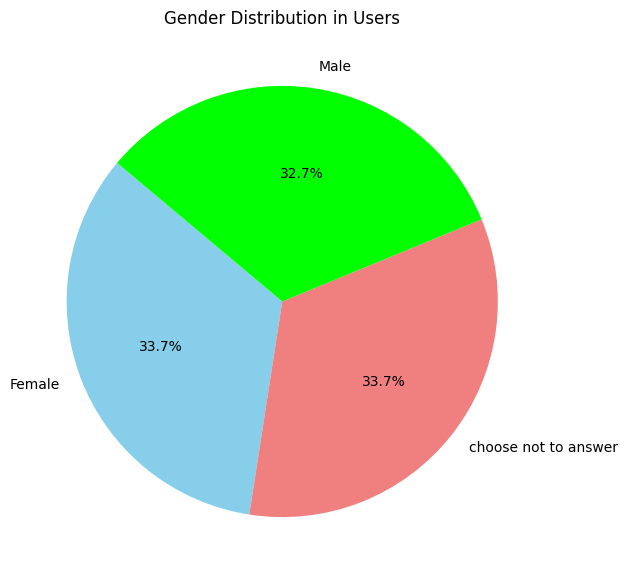

In [ ]:
from collections import Counter
# Fetch gender data from Users table
cursor.execute("SELECT Gender FROM Users")
genders = [row[0] for row in cursor.fetchall()]

conn.close()

gender_counts = Counter(genders)

# Plot the gender distribution
plt.figure(figsize=(7, 7))
plt.pie(gender_counts.values(), labels=gender_counts.keys(), autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lime'], startangle=140)
plt.title("Gender Distribution in Users")
plt.show()

<ipython-input-20-5b0536a6ab71>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Category", y="Item_Cost", data=df, palette="Set2")


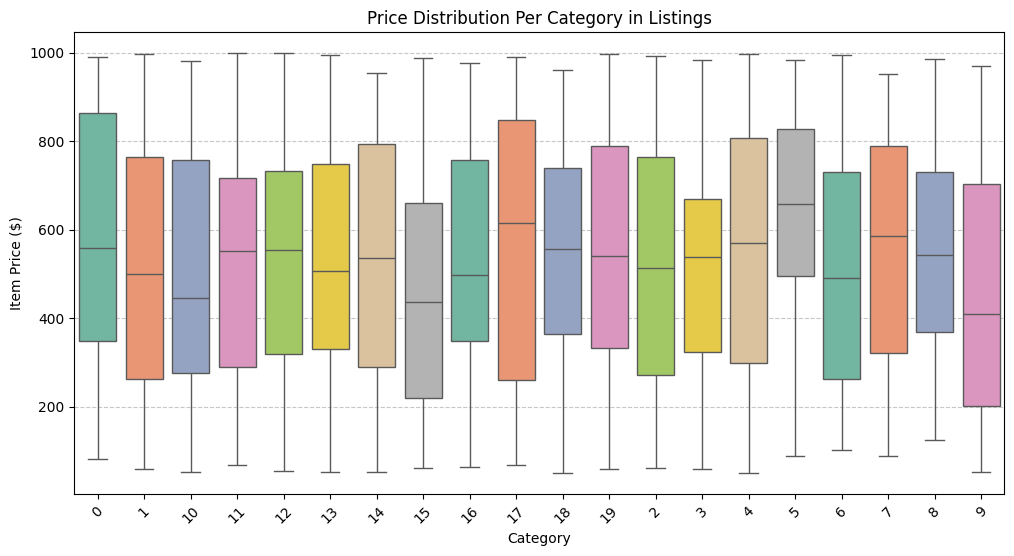

In [ ]:
import seaborn as sns
conn = sqlite3.connect(DATABASE_PATH, timeout=10)
cursor = conn.cursor()
cursor.execute("SELECT Category, Item_Cost FROM Listings")
data = cursor.fetchall()

df = pd.DataFrame(data, columns=["Category", "Item_Cost"])

df = df.sort_values(by="Category")

plt.figure(figsize=(12, 6))
sns.boxplot(x="Category", y="Item_Cost", data=df, palette="Set2")

plt.xlabel("Category")
plt.ylabel("Item Price ($)")
plt.title("Price Distribution Per Category in Listings")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
conn.commit()
cursor.close()
conn.close()

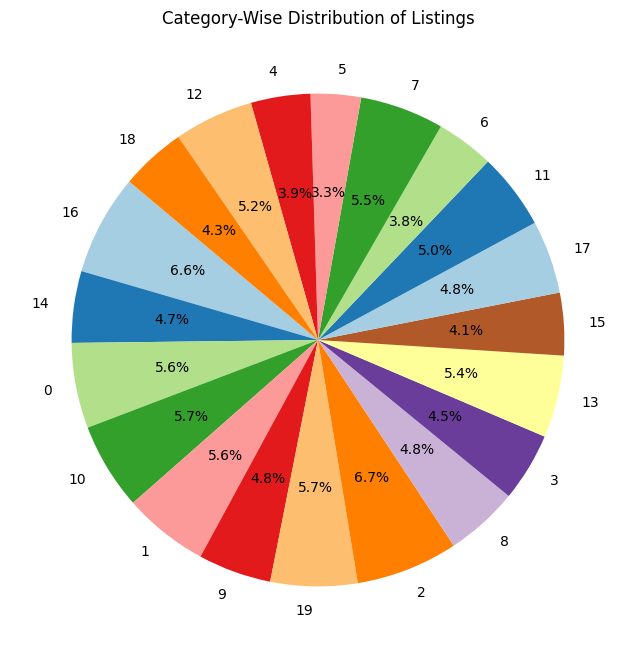

In [ ]:
conn = sqlite3.connect(DATABASE_PATH, timeout=10)
cursor = conn.cursor()
cursor.execute("SELECT Category FROM Listings")
categories = [row[0] for row in cursor.fetchall()]

conn.close()

# Count occurrences of each category
category_counts = Counter(categories)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts.values(),labels=category_counts.keys(),autopct='%1.1f%%',startangle=140,colors=plt.cm.Paired.colors)
plt.title("Category-Wise Distribution of Listings")
plt.show()


In [ ]:
conn = sqlite3.connect(DATABASE_PATH, timeout=10,isolation_level=None)
cursor = conn.cursor()

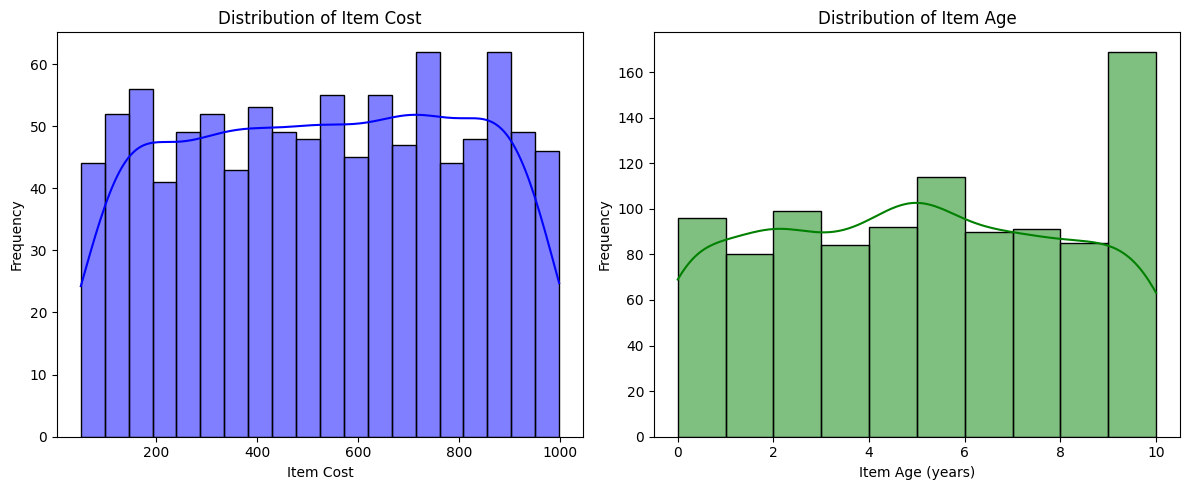

In [ ]:
df = pd.read_sql_query("SELECT Item_Cost, Item_Age FROM Listings", conn)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Item_Cost'], bins=20, kde=True, color='blue')
plt.xlabel("Item Cost")
plt.ylabel("Frequency")
plt.title("Distribution of Item Cost")

plt.subplot(1, 2, 2)
sns.histplot(df['Item_Age'], bins=10, kde=True, color='green')
plt.xlabel("Item Age (years)")
plt.ylabel("Frequency")
plt.title("Distribution of Item Age")

plt.tight_layout()
plt.show()


In [ ]:
conn.commit()
cursor.close()
conn.close()

In [ ]:
conn = sqlite3.connect(DATABASE_PATH, timeout=10)
cursor = conn.cursor()

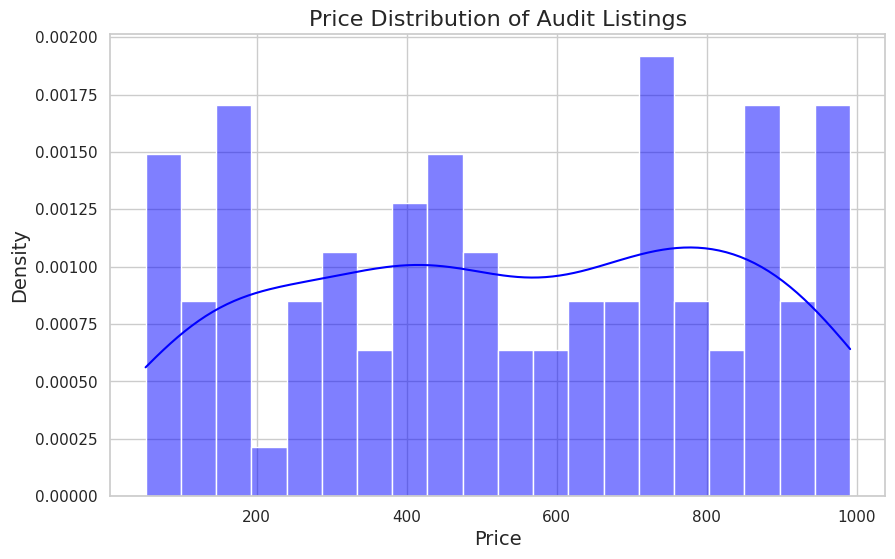

In [ ]:
cursor.execute("SELECT price FROM Audit")
price_data = cursor.fetchall()

price = [row[0] for row in price_data]

conn.close()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(price, kde=True, bins=20, color='blue', stat='density')
plt.title('Price Distribution of Audit Listings', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

In [ ]:
import pandas as pd
from collections import defaultdict
import pandas as pd
from collections import defaultdict

# Reconnect to database
conn = sqlite3.connect('/content/SwitchItUp.db')
cursor = conn.cursor()


In [ ]:
import pandas as pd
from collections import defaultdict
from faker import Faker # Importing the Faker library


# Assuming you want to fetch data from the 'Users' table
df = pd.read_sql_query("SELECT * FROM Users", conn) # Creating the DataFrame 'df'

fake = Faker() # Initializing Faker after DataFrame creation

# Now you can use df in your code
# Instead of 'Name', use 'first_name' for male and female names
df.loc[df["Gender"] == "male", "first_name"] = df[df["Gender"] == "male"]["first_name"].apply(lambda x: fake.first_name_male())
df.loc[df["Gender"] == "female", "first_name"] = df[df["Gender"] == "female"]["first_name"].apply(lambda x: fake.first_name_female())

In [ ]:
# prompt: check all columns data that have been changed

import sqlite3
import pandas as pd

DATABASE_PATH = 'SwitchItUp.db'

conn = sqlite3.connect(DATABASE_PATH)
cursor = conn.cursor()

# Function to identify changed columns
def find_changed_columns(table_name, original_df, updated_df):
    changed_cols = []
    for col in original_df.columns:
        if not original_df[col].equals(updated_df[col]):
            changed_cols.append(col)
    return changed_cols

# Example usage (assuming you have original data in 'original_df')
original_df = pd.read_sql_query("SELECT * FROM Users", conn)
# Simulate updates (replace with actual update logic if needed)
updated_df = pd.read_sql_query("SELECT * FROM Users", conn)  # Get the updated data

changed_columns = find_changed_columns("Users", original_df, updated_df)

if changed_columns:
    print("Changed Columns in Users Table:")
    for col in changed_columns:
      print(col)
else:
    print("No columns have been changed in the 'Users' table.")

conn.close()


In [ ]:
cursor.execute("""
SELECT * FROM Users
""")
pd.DataFrame(cursor.fetchall(), columns=['User_id', 'first_name', 'last_name', 'email', 'Address', 'Gender'])

,User_id,first_name,last_name,email,Address,Gender
0,1,April,Lewis,wrangel@example.org,"287 Newton Court\nNorth Janettown, PW 81000",choose not to answer
1,2,Duane,Hart,robinsonbrittany@example.net,"335 Jennifer Pines\nWest Robertside, MO 04487",choose not to answer
2,3,Brittany,Hurst,justin48@example.com,"6577 Carol Estate\nKarenstad, WY 32669",choose not to answer
3,4,Shaun,Rivera,gpalmer@example.com,"32973 Moore Canyon\nBriannafort, IL 89038",choose not to answer
4,5,Leslie,Campbell,imitchell@example.com,"0488 Hernandez Estate Suite 326\nTranport, DC ...",choose not to answer
...,...,...,...,...,...,...
1495,1496,Connie,Mitchell,woodcraig@example.net,"662 Melissa Fields\nMercerberg, MS 78376",Male
1496,1497,Kevin,Bennett,yguerrero@example.org,"825 Hall Walks\nCarolfort, AR 14824",Male
1497,1498,Dana,Smith,bryantsheryl@example.org,"2307 Rosario Plains\nSouth Bruce, GA 19953",Female
1498,1499,Andrew,Jackson,ahutchinson@example.net,"4152 Casey Station\nWest Melaniebury, DE 22311",Female


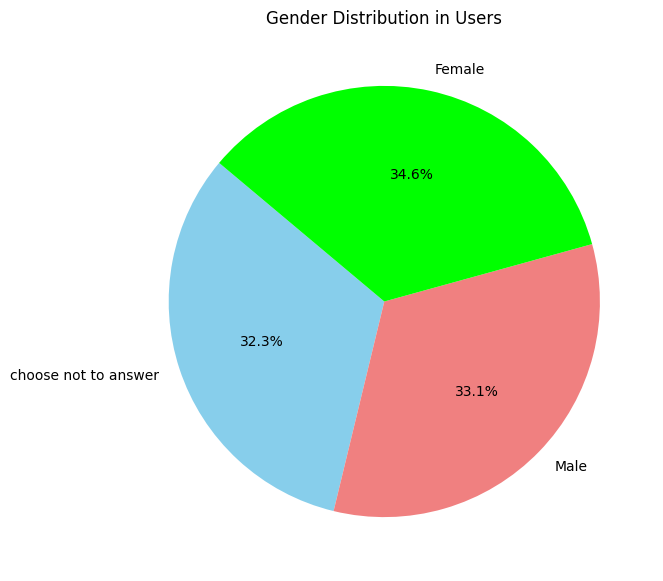

In [ ]:
from collections import Counter
# Fetch gender data from Users table
cursor.execute("SELECT Gender FROM Users")
genders = [row[0] for row in cursor.fetchall()]

conn.close()

gender_counts = Counter(genders)

# Plot the gender distribution
plt.figure(figsize=(7, 7))
plt.pie(gender_counts.values(), labels=gender_counts.keys(), autopct='%1.1f%%', colors=['skyblue', 'lightcoral', 'lime'], startangle=140)
plt.title("Gender Distribution in Users")
plt.show()

In [ ]:
cursor.execute("""
SELECT * FROM Item_category
""")
pd.DataFrame(cursor.fetchall(), columns=[ 'Item_ID','Category'])


,Item_ID,Category
0,1,Art & Craft Materials
1,2,Bathroom Essentials
2,3,Bedding & Linens
3,4,Books & Magazines
4,5,Cleaning Supplies
5,6,Clothing & Accessories
6,7,Cookware
7,8,Electronics
8,9,Furniture
9,10,Gardening Supplies


In [ ]:
if conn:
    try:
        cur = conn.cursor()
        # Drop the columns
        cur.execute("ALTER TABLE Listings DROP COLUMN Product_Description;")
        conn.commit()
        print("Header columns removed successfully.")

    except Exception as e:
        print("Error:", e)

    finally:
        conn.close()


In [ ]:
conn = sqlite3.connect(DATABASE_PATH)
cursor = conn.cursor()

if conn:
    try:
        query_add_column = """
        ALTER TABLE Listings
        ADD COLUMN Product_description TEXT;
        """
        conn.execute(query_add_column)
        conn.commit()

        # Step 3: Update the 'Description' for each product
        update_query = """
        UPDATE Listings
        SET Product_description =
            CASE
                WHEN Selling_Format = 'Sell' THEN 'Product available to sell'
                WHEN Selling_Format = 'Rent' THEN 'Product available to rent'
                WHEN Selling_Format = 'Swap' THEN 'Product available to swap'
                WHEN Selling_Format = 'Trade' THEN 'Product available to trade'
                ELSE 'Product available'
            END;
        """
        conn.execute(update_query)
        conn.commit()

        print("Description updated successfully for all records.")

    except Exception as e:
        print("Error updating descriptions:", e)

    finally:
        conn.close()

In [ ]:
conn = sqlite3.connect(DATABASE_PATH)
cursor = conn.cursor()

if conn:
    try:
        # Step 1: Add a new 'Header' column if it doesn't exist
        query_add_column = """
        ALTER TABLE Listings
        ADD COLUMN Header TEXT;
        """
        conn.execute(query_add_column)
        conn.commit()

        # Step 2: Update the 'Header' with item cost information
        update_query = """
        UPDATE Listings
        SET Header =
            CASE
                WHEN Selling_Format = 'Sell' THEN 'Product available to sell for ' || item_cost || ' USD'
                WHEN Selling_Format = 'Rent' THEN 'Product available to rent for ' || item_cost || ' USD'
                WHEN Selling_Format = 'Swap' THEN 'Product available to swap, valued at ' || item_cost || ' USD'
                WHEN Selling_Format = 'Trade' THEN 'Product available to trade, valued at ' || item_cost || ' USD'
                ELSE 'Product available, cost: ' || Item_Cost || ' USD'
            END;
        """
        conn.execute(update_query)
        conn.commit()

        print("Header updated successfully with item cost information.")

    except Exception as e:
        print("Error updating header:", e)

    finally:
        conn.close()


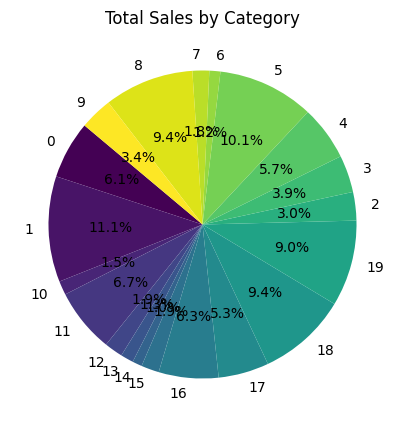

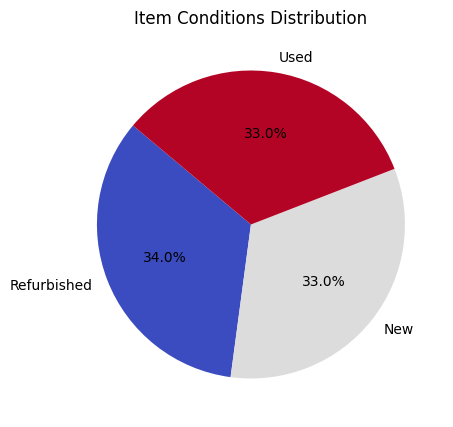

In [ ]:


# Connect to database
db_path="/content/SwitchItUp(2).db"
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

if conn:
    try:
        # Fetch price from Audit table and condition from Listings table
        query = """
        SELECT a.price, l.Condition, l.Category
        FROM Audit a
        JOIN Listings l ON a.Listing_id = l.Listing_id;
        """
        df = pd.read_sql(query, conn)

        # Aggregate price data by category
        category_prices = df.groupby('Category')['price'].sum()

        plt.figure(figsize=(10, 5))
        category_prices.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='viridis')
        plt.title("Total Sales by Category")
        plt.ylabel("")
        plt.show()

        # Aggregate condition data
        condition_counts = df['Condition'].value_counts()

        plt.figure(figsize=(10, 5))
        condition_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='coolwarm')
        plt.title("Item Conditions Distribution")
        plt.ylabel("")
        plt.show()
    except Exception as e:
        print("Error analyzing trends:", e)
    finally:
        conn.close()

In [ ]:
if conn:
    try:
        # Fetch lower-value items (below median price) and transaction type
        query = """
        WITH price_stats AS (
            SELECT price FROM Audit ORDER BY price
        )
        SELECT l.Category, a.price, l.Selling_Format
        FROM Audit a
        JOIN Listings l ON a.Listing_id = l.Listing_id
        WHERE a.price <= (SELECT price FROM price_stats LIMIT 1 OFFSET (SELECT COUNT(*)/2 FROM price_stats));
        """
        df = pd.read_sql(query, conn)

        # Debug: Print the first few rows of the dataframe
        print("Data fetched:\n", df.head())

        # Filter for relevant categories (books, small electronics)
        relevant_categories = ['Books', 'Small Electronics']
        df_filtered = df[df['Category'].isin(relevant_categories)]

        # Debug: Print the filtered dataframe
        print("Filtered data:\n", df_filtered.head())

        # Aggregate swapping data
        swap_counts = df_filtered[df_filtered['Selling_Format'] == 'Swap']['Category'].value_counts()

        # Debug: Check swap_counts before plotting
        print("Swap counts:\n", swap_counts)

        # If swap_counts is empty, the plot will not display meaningful data
        if not swap_counts.empty:
            plt.figure(figsize=(10, 5))
            swap_counts.plot(kind='bar', color='purple', alpha=0.7)
            plt.title("Swapping Frequency for Lower-Value Items")
            plt.xlabel("Category")
            plt.ylabel("Count")
            plt.show()
        else:
            print("No 'Swap' entries found in the filtered data.")

    except Exception as e:
        print("Error analyzing trends:", e)
    finally:
        conn.close()


Data fetched:
   Category  price Selling_Format
0       14    191           Sell
1        1    123           Sell
2        0    186       Anything
3        1    478           Rent
4        8    382           Swap
Filtered data:
 Empty DataFrame
Columns: [Category, price, Selling_Format]
Index: []
Swap counts:
 Series([], Name: count, dtype: int64)
No 'Swap' entries found in the filtered data.


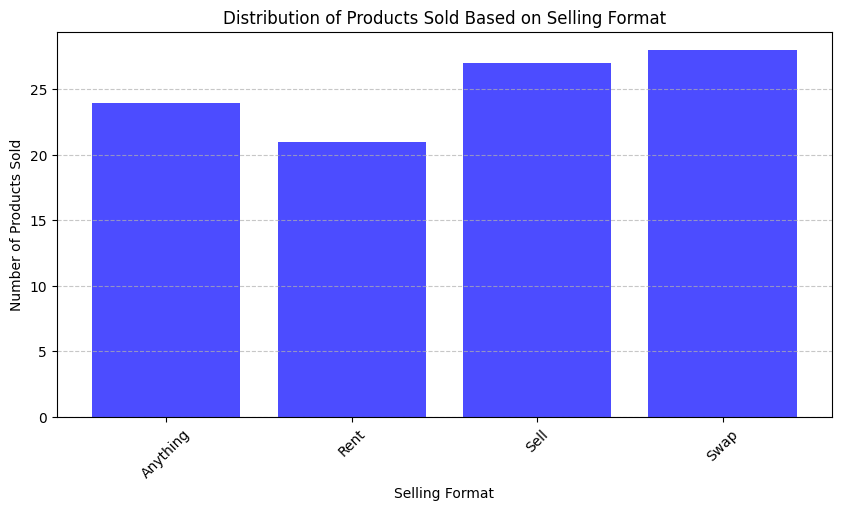

In [ ]:


# Connect to the database
conn = sqlite3.connect('/content/SwitchItUp(2).db')  # Update with your actual database file

if conn:
    try:
        # Query to get Selling_Format from Listings for items that were sold (exist in Audit)
        query = """
        SELECT l.Selling_Format, COUNT(*) AS Count
        FROM Audit a
        JOIN Listings l ON a.Listing_id = l.Listing_id
        GROUP BY l.Selling_Format;
        """

        # Load data into a DataFrame
        df = pd.read_sql(query, conn)

        # Plot the bar chart
        plt.figure(figsize=(10, 5))
        plt.bar(df['Selling_Format'], df['Count'], color='blue', alpha=0.7)

        # Labels and title
        plt.xlabel("Selling Format")
        plt.ylabel("Number of Products Sold")
        plt.title("Distribution of Products Sold Based on Selling Format")
        plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        # Show the graph
        plt.show()

    except Exception as e:
        print("Error generating the bar graph:", e)

    finally:
        conn.close()
